In [1]:
from torchvision import models,transforms
from PIL import Image
import matplotlib.pyplot as plt
from Dataset.HatefulMemeDataset import HatefulMemeDataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
import torch
device = 'cpu'

/opt/homebrew/Caskroom/miniforge/base/envs/gnn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# model = models.segmentation.fcn_resnet50(pretrained=True).to(device).eval()
# model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True).to(device).eval() #mask_rcnn
# model = models.detection.maskrcnn_resnet50_fpn_v2(pretrained=True).to(device).eval() #mask_rcnn
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True).to(device).eval() #mask_rcnn



/opt/homebrew/Caskroom/miniforge/base/envs/gnn/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/gnn/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
image_transform = transforms.Compose(
            [
                transforms.Resize(size=(224, 224)),
                transforms.ToTensor()
            ]
        )
model_name = 'Hate-speech-CNERG/bert-base-uncased-hatexplain'
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=True)
dataset = HatefulMemeDataset('./data','train',image_transform,tokenizer)
train_loader = DataLoader(dataset, batch_size=3, shuffle=True,collate_fn=dataset.collate_fn)

In [4]:
for images, tokenized_text, attention_masks, labels in train_loader:
    print(type(images))
    outputs = model(images)

    break


./data/img/12356.png
./data/img/12504.png
./data/img/34675.png
<class 'torch.Tensor'>


In [5]:
len(outputs)

3

In [12]:
print(images[0].shape)
print(outputs[0]['masks'].shape)
print((outputs[0]['masks']*images[0]).shape)

torch.Size([3, 224, 224])
torch.Size([28, 1, 224, 224])
torch.Size([28, 3, 224, 224])


In [24]:
from Models.Encoder import ImageEncoder,TextEncoder,ProjectionHead
imgModel = ImageEncoder()
image_projection = ProjectionHead(2048)

In [26]:
embeddings = []
masks = []
for i,output in enumerate(outputs):
    masks.append(output['masks']*images[i])
    embeddings.append(image_projection(imgModel(output['masks']*images[i])))

In [44]:
.shape

28

In [18]:
y = image_projection(imgModel(masks[0]))

In [19]:
y.shape

torch.Size([28, 256])

In [146]:
outputs[0].keys()

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [13]:
imgMaskeds = imgTensor*outputs[0]['masks']
imgMaskeds.shape

NameError: name 'imgTensor' is not defined

In [11]:
masked = []
for i in range(len(outputs[0]['scores'])):
    if outputs[0]['scores'][i]>0.0:
        masked.append(i)
masked


[0, 1, 2]

In [12]:
imgMasked = imgMaskeds[0][0,:,:].detach().numpy()
plt.imshow(imgMasked)


NameError: name 'imgMaskeds' is not defined

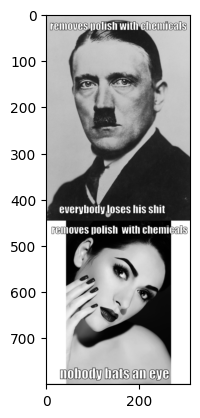

In [83]:
# x=outputs['aux'][0,:,:].detach().numpy()
plt.imshow(image)


In [22]:
x.shape

(21, 800, 312)

In [1]:
import torch_geometric

/opt/homebrew/Caskroom/miniforge/base/envs/gnn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

: 

In [35]:
x = torch.tensor([[0, 1, 0],[1, 0, 0]], dtype=torch.long)
x.shape

torch.Size([2, 3])

In [36]:
import numpy as np

In [41]:
x = torch.tensor([[0]*(3),[i for i in range(3)]],dtype=torch.long)

In [42]:
x.shape

torch.Size([2, 3])